## Diana Rueda

#### SID: 912172783

In [1]:
# Assignment-1 (HW1)

# Guidelines:

# We will be using Python for coding. Please install Jupyter notebook (available in Anaconda Navigator) as a recommended editor tool.
# The homework should be submitted electronically through Canvas before the submission deadline.
# Hard Submission Deadline: 11:30 PM
# Late Submission is 0 credit.
# Plagiarism is a clear violation of honor code!
# Shared/copied code from any source is not allowed, as it is considered plagiarism.
# _ 0 for the corresponding assignment in the 1st attempt.
# _ F for the course in the 2nd attempt!

# Your submission should be a zip file which contains the following:
# (a) a report in pdf format (use this label "report_HW1.pdf") that includes your answers to all questions, plots, figures and any instructions to run your code,
# (b) the python code files. 

# Please pay attention to the following points:
# (a) do not include the files which are already provided to you for the assignment such as datasets,
# (b) each function should be written with the appropriate commments and documentation in the code so it is understandable.
# Please describe what your code does,and how a functionality is implemented
# (c) do not use any toolbox unless it is explicitly allowed in the homework description.

# Assignment Description:
# For this assignment, download “Auto MPG” dataset (“auto-mpg.data” file; 398 cars, 9 features; remove the 6 records with missing
# values to end up with 392 samples) that is available in the UCIMachine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
# create a working directory for your assignment code, and save the dataset in a destination folder, called 'datasets'
# use the following sample code to import the dataset into pandas dataframe.
# From this point on, you need to code your solution from scratch. Unless explicitly stated,
# it is fine to use open source code, for example, sci-kit learn, to help you write your own implementation# of the methods.

In [2]:
import os
os.getcwd()

'/Users/dlrueda/Documents/ECS171'

In [3]:
# read the saved dataset into pandas dataframe
import pandas as pd
df = pd.read_csv('/Users/dlrueda/Documents/ECS171/datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

## Provide code and results in your submission addressing the following questions:

### 1: [10pt]

Allowed libraries: pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

(a) Report the percentage of the missing data and write your own code to remove the observations with missing values '?'.


In [5]:
# a
#take note of initial number of observations and column names
init_rows = df.shape[0]
columns = df.columns


The number of initial rows is:

In [6]:
init_rows

398

In [7]:
#drop the rows with "?" and count the number of rows removed in each iteration
num_removed = 0 #variable to keep track of the number of missing values
for i in columns:
    rowstoremove = df.index[df[i] == '?']
    num_removed += len(list(rowstoremove))
    df.drop(index = rowstoremove, inplace = True)
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
###################
#make note of the number of rows after removing missing values
final_rows = df.shape[0]


The number of final rows is:

In [9]:
final_rows

392

In [10]:
#calculate the percentage of missing values
qmark_percentage = (num_removed * 100) / init_rows


The percentage of missing values '?' is:

In [11]:
qmark_percentage

1.5075376884422111

(b) Next, plot the distribution of the # make of a car (for instance 'ford' is a make of a car), by processing the information provided under the 'car_name' attribute. For instance, 'chevrolet chevelle malibu' is a 'chevrolet' and you can write code to create a bar plot and show the count of observations for each make of a car such as 'ford', 'volkswagon', etc.

In [12]:
#reset index
df.reset_index(drop=True, inplace = True)

In [13]:
#create vector/list with only names of car make
#get the values from car_names column then split and put in car_make
#a_string.split()[0] #get first word of string a_string
car_names = df['car_name']


In [14]:
#apply split()[0] to each entry of car_names and place in car_make
car_make = [None] * final_rows
for i in range(len(car_names)):
    car_make[i] = car_names[i].split()[0]


In [15]:
#count car_make and place ina dictionary
dict_makecount = {}
for i in car_make:
    if i in dict_makecount: 
        dict_makecount[i] += 1
    else: dict_makecount[i] = 1

In [16]:
#correct values of misspelled makes
dict_makecount['toyota'] = dict_makecount['toyota'] + dict_makecount['toyouta']
dict_makecount['mazda'] = dict_makecount['mazda'] + dict_makecount['maxda']
dict_makecount['chevrolet'] = dict_makecount['chevrolet'] + dict_makecount['chevroelt']
dict_makecount['volkswagen'] = dict_makecount['volkswagen'] + dict_makecount['vokswagen']
removed_toyouta = dict_makecount.pop('toyouta')
removed_maxda = dict_makecount.pop('maxda')
removed_chebroelt = dict_makecount.pop('chevroelt')
removed_vokswagen = dict_makecount.pop('vokswagen')

In [17]:
#get dictionary values in data frame
make_count = pd.DataFrame(list(dict_makecount.items()), columns = ['car_make', 'count'])

The following is a chart with the number of observations per car make after adjusting for misspelled names:

In [18]:
make_count

,car_make,count
0,chevrolet,44
1,buick,17
2,plymouth,31
3,amc,27
4,ford,48
5,pontiac,16
6,dodge,28
7,toyota,26
8,datsun,23
9,volkswagen,16


This is the plot of the chart above showing the amount of observations per car make:

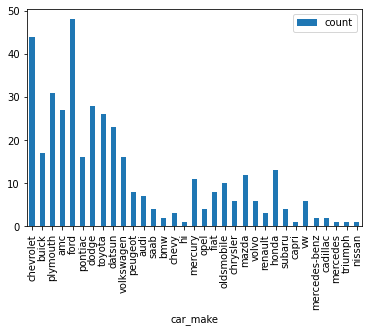

In [19]:
#plot make_count 
make_count.plot.bar(x = 'car_make', y = 'count')


### 2: [10pt]

Allowed libraries: pandas

(a) Lets assume that the goal is to classify the cars into 3 categories based on the weight attribute: light, medium, and heavy. Discover the threshold for each category, so that all samples are divided into three equally-sized bins.


In [20]:
#determine cuts for bins
max_weight = df['weight'].max()
cut1 = max_weight / 3
cut2 = cut1 * 2

In [21]:
#set bins and labels to use as parameters later
bins = [0, cut1, cut2, max_weight]
labels = ['light',' medium', 'heavy']

The threshold for each category is:

In [22]:
bins

[0, 1713.3333333333333, 3426.6666666666665, 5140.0]

In [23]:
#get list of the binned weights
weight_binned = pd.cut(df['weight'], bins = bins, labels = labels)

In [24]:
#create dataframe of the count of the binned weights
weight_count = pd.DataFrame(weight_binned.value_counts())

(b) Next, plot a histogram to show the count of observations in each bin.

Plot shows the amount of observations per weight category:

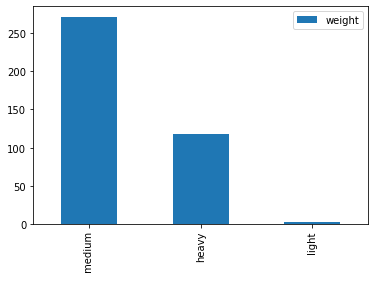

In [25]:
#plot binned weights
weight_count.plot.bar(y = 'weight')

### 3: [10pt]

Allowed libraries: pandas, seaborn

(a) Create a 2D correlation matrix plot, similar to this example (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 and use seaborn library. You may use any published code to perform this.


In [26]:
import seaborn as sns

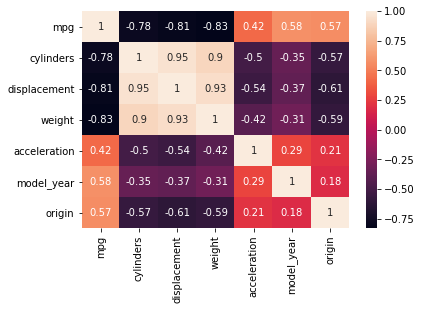

In [27]:
sns.heatmap(df.corr(), annot = True)

(b) Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation. (i.e., positive or negative correlation)

There is a strong positive correlation between cylinders and displacement that is to be expected because of the function those two aspects perform in a car. In the same way I expected model_year to have very low correlation with all the variables, specially with origin. Model_year and origin have the lowest correlation with the rest of the variables because they discribe something that does not determine directly the car performance, as oppossed to the other variables that quantify a certain physical aspect of the car or its performance.

### 4: [20pt]

Allowed libraries: pandas, numpy

(a) Write a linear regression solver that can accommodate polynomial basis functions on a single variable for prediction of weight. Your code should use the Ordinary Least Squares (OLS) estimator (i.e. the Maximum-likelihood estimator). Code this from scratch. Its recommended to use a library (e.g. numpy) for basic linear algebra operations (addition,multiplication and inverse).

In [28]:
import numpy as np
from numpy import random

In [29]:
# one function/class for all. Takes in split ratio, independent, dependent, degree
class regression:
    def __init__(self, data, x, y, order, ratio, randomstate):
        self.x = x
        self.y = y
        self.order = order
        self.ratio = ratio
        self.data = data
        self.randomstate = randomstate
      
    #split dataset
    def train(self):
        train = self.data.sample(frac = self.ratio, random_state = self.randomstate) #random state is a seed value
        train = train[[self.y, self.x]].astype(float)
        return train
        
    def test(self):
        test = self.data.drop(self.train().index)
        test = test[[self.y, self.x]].astype(float)
        return test
    
    #adjust for model order: default is 1
    def shape_data(self):
        #use if statement
        if self.order == 0:
            X = np.ones(shape = (self.train().shape[0],1))
            Y = np.array(self.train()[self.y])
            return X,Y
        elif self.order == 1:
            a = np.ones(shape = (self.train().shape[0],1))
            X = np.append(a.reshape((self.train().shape[0],1)),self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0],1)), axis = 1)
            Y = np.matrix(self.train()[self.y])
            return X,Y
        elif self.order == 2:
            a = np.ones(shape = (self.train().shape[0],1))
            x1 = self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0],1))
            x2 = np.square((self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0],1))))
            X = np.column_stack((a,x1,x2))
            Y = np.matrix(self.train()[self.y])
            return X,Y
        elif self.order == 3:
            a = np.ones(shape = (self.train().shape[0],1))
            x1 = self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0],1))
            x2 = np.square((self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0],1))))
            x3 = np.power(self.train()[self.x].to_numpy(dtype = 'object').reshape((self.train().shape[0], 1)), 3)
            X = np.column_stack((a,x1,x2, x3))
            Y = np.matrix(self.train()[self.y])
            return X,Y
    
    #find MLE estimators: w0, w1, w2, w3
    def weights(self):
        if self.order == 0:
            xT_timesx = self.shape_data()[0].transpose().dot(np.squeeze(np.asarray(self.shape_data()[0])))
            xT_timesy = self.shape_data()[0].transpose().dot(np.squeeze(np.asarray(self.shape_data()[1])))
            w = (1 / (xT_timesx)) * xT_timesy
        else:
            xT_timesx = self.shape_data()[0].transpose().dot(np.squeeze(np.asarray(self.shape_data()[0])))
            xT_timesy = self.shape_data()[0].transpose().dot(np.squeeze(np.asarray(self.shape_data()[1])))
            w = np.linalg.inv(xT_timesx.astype(float)).dot(xT_timesy)
        return w
    
    #build predict function
    def predicted(self):
        error = random.normal(size = (self.train().shape[0],1))
        predicted = self.shape_data()[0].dot(self.weights()) + error
        return predicted
    
    #traning mean square error
    def mse_train(self):
        n_1 = (1/self.train()[self.x].shape[0])
        mse_train = n_1 * np.sum(np.square(np.subtract(np.asarray(self.train()[self.y]), np.asarray(self.predicted())))) 
        return mse_train

    #function shapes the test data to accomodate for the model
    def test_shape_data(self):
        #use if statement
        if self.order == 0:
            X = np.ones(shape = (self.test().shape[0],1))
            Y = np.matrix(self.test()[self.y])
            return X,Y
        elif self.order == 1:
            a = np.ones(shape = (self.test().shape[0],1))
            X = np.append(a.reshape((self.test().shape[0],1)),self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0],1)), axis = 1)
            Y = np.matrix(self.test()[self.y])
            return X,Y
        elif self.order == 2:
            a = np.ones(shape = (self.test().shape[0],1))
            x1 = self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0],1))
            x2 = np.square(self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0],1)))
            X = np.column_stack((a,x1,x2))
            Y = np.matrix(self.train()[self.y])
            return X,Y
        elif self.order == 3:
            a = np.ones(shape = (self.test().shape[0],1))
            x1 = self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0],1))
            x2 = np.square(self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0],1)))
            x3 = np.power(self.test()[self.x].to_numpy(dtype = 'object').reshape((self.test().shape[0], 1)), 3)
            X = np.column_stack((a,x1,x2,x3))
            Y = np.matrix(self.test()[self.y])
            return X,Y
   
    def test_predicted(self):
        error = random.normal(size = (self.test().shape[0],1))
        predicted = self.test_shape_data()[0].dot(self.weights()) + error
        return predicted
    
    #testing mean square error
    def mse_test(self):
        n_1 = 1/self.test()[self.x].shape[0]
        mse_test = n_1 * np.sum(np.square(np.subtract(np.asarray(self.test()[self.y]), np.asarray(self.test_predicted()))))
        return mse_test
    

### 5: [20pt]

Allowed libraries: pandas, numpy

(a) Split the dataset 70:30 for training and testing respectively.

(b) Use your solution to regress weight (dependent variable) on each of the 7 non-car_name features (independent variables). Do this for the 0th to 3rd order of the independent variables.


In [30]:
#fit the models for cylinders in all orders
model_cylinders0 = regression(data= df, x = 'cylinders', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_cylinders1 = regression(data= df, x = 'cylinders', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_cylinders2 = regression(data= df, x = 'cylinders', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_cylinders3 = regression(data= df, x = 'cylinders', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [31]:
#Fit the models for displacement in all orders
model_displacement0 = regression(data= df, x = 'displacement', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_displacement1 = regression(data= df, x = 'displacement', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_displacement2 = regression(data= df, x = 'displacement', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_displacement3 = regression(data= df, x = 'displacement', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [32]:
#fit models for horsepower
model_horsepower0 = regression(data= df, x = 'horsepower', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_horsepower1 = regression(data= df, x = 'horsepower', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_horsepower2 = regression(data= df, x = 'horsepower', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_horsepower3 = regression(data= df, x = 'horsepower', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [33]:
#fit models for mpg
model_mpg0 = regression(data= df, x = 'mpg', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_mpg1 = regression(data= df, x = 'mpg', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_mpg2 = regression(data= df, x = 'mpg', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_mpg3 = regression(data= df, x = 'mpg', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [34]:
#fit models for acceleration
model_acceleration0 = regression(data= df, x = 'acceleration', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_acceleration1 = regression(data= df, x = 'acceleration', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_acceleration2 = regression(data= df, x = 'acceleration', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_acceleration3 = regression(data= df, x = 'acceleration', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [35]:
#fit models for model_year
model_model_year0 = regression(data= df, x = 'model_year', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_model_year1 = regression(data= df, x = 'model_year', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_model_year2 = regression(data= df, x = 'model_year', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_model_year3 = regression(data= df, x = 'model_year', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


In [36]:
#fit models for origin
model_origin0 = regression(data= df, x = 'origin', y = 'weight', order = 0, ratio = 0.7, randomstate = 100)
model_origin1 = regression(data= df, x = 'origin', y = 'weight', order = 1, ratio = 0.7, randomstate = 100)
model_origin2 = regression(data= df, x = 'origin', y = 'weight', order = 2, ratio = 0.7, randomstate = 100)
model_origin3 = regression(data= df, x = 'origin', y = 'weight', order = 3, ratio = 0.7, randomstate = 100)


(c) Calculate the training and testing mean squared errors for each variable and order individually.

In [37]:
#create arrays to put in data frame containing MSE values as columns
set_class = pd.array([ 'set type', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing'])
variable = pd.array([ 'variable name', 'cylinders', 'cylinders', 'mpg', 'mpg', 'displacement', 'displacement', 'horsepower', 'horsepower', 'acceleration', 'acceleration', 'model_year', 'model_year', 'origin', 'origin'])
order0 = pd.array([ 'MSE in order 0 poly', model_cylinders0.mse_train(), model_cylinders0.mse_test(), 
                   model_mpg0.mse_train(), model_mpg0.mse_test(),
                   model_displacement0.mse_train(), model_displacement0.mse_test(),
                   model_horsepower0.mse_train(), model_horsepower0.mse_test(),
                   model_acceleration0.mse_train(), model_acceleration0.mse_test(),
                   model_model_year0.mse_train(), model_model_year0.mse_test(),
                   model_origin0.mse_train(), model_origin0.mse_test()])

order1 = pd.array([ 'MSE in order 1 poly', model_cylinders1.mse_train(), model_cylinders1.mse_test(), 
                   model_mpg1.mse_train(), model_mpg1.mse_test(),
                   model_displacement1.mse_train(), model_displacement1.mse_test(),
                   model_horsepower1.mse_train(), model_horsepower1.mse_test(),
                   model_acceleration1.mse_train(), model_acceleration1.mse_test(),
                   model_model_year1.mse_train(), model_model_year1.mse_test(),
                   model_origin1.mse_train(), model_origin1.mse_test()])

order2 = pd.array(['MSE in order 2 poly', model_cylinders2.mse_train(), model_cylinders2.mse_test(), 
                   model_mpg2.mse_train(), model_mpg2.mse_test(),
                   model_displacement2.mse_train(), model_displacement2.mse_test(),
                   model_horsepower2.mse_train(), model_horsepower2.mse_test(),
                   model_acceleration2.mse_train(), model_acceleration2.mse_test(),
                   model_model_year2.mse_train(), model_model_year2.mse_test(),
                   model_origin2.mse_train(), model_origin2.mse_test()])

order3 = pd.array(['MSE in order 3 poly',model_cylinders3.mse_train(), model_cylinders3.mse_test(), 
                   model_mpg3.mse_train(), model_mpg3.mse_test(),
                   model_displacement3.mse_train(), model_displacement3.mse_test(),
                   model_horsepower3.mse_train(), model_horsepower3.mse_test(),
                   model_acceleration3.mse_train(), model_acceleration3.mse_test(),
                   model_model_year3.mse_train(), model_model_year3.mse_test(),
                   model_origin3.mse_train(), model_origin3.mse_test()])


The following dataframe is based on models uilt from a 70:30 split. It contains per column: the classification of the dataset (test or training), the variable name, and the MSE obtained from the 0 to 3 degree polynomials obtained above in order.

In [38]:
mse_df_7020 = pd.DataFrame([set_class, variable, order0, order1, order2, order3])
mse_df_7020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,set type,training,testing,training,testing,training,testing,training,testing,training,testing,training,testing,training,testing
1,variable name,cylinders,cylinders,mpg,mpg,displacement,displacement,horsepower,horsepower,acceleration,acceleration,model_year,model_year,origin,origin
2,MSE in order 0 poly,190675224.23357636,92367268.06396866,190675239.23176423,92367866.26741245,190675230.40061513,92366008.7243845,190675250.35249287,92367051.26463324,190675281.00943175,92360513.13403389,190675303.9512332,92368368.5554472,190675264.9164707,92365454.73251896
3,MSE in order 1 poly,36563257.70740239,18355370.216080938,59115858.46819933,27826409.396369923,21967141.881854758,14814832.238533452,46738319.40765864,24637521.95455479,163908677.5384392,70331629.38492978,171488966.64509112,84521788.53475705,124770509.35826495,61142971.166768804
4,MSE in order 2 poly,36562845.04438871,18372359.506720405,39561455.843817085,17579947.38695923,20221015.76418508,13114309.262312293,42166117.75717114,19710141.000639554,151603835.57433218,68116863.48487824,169465915.10328892,83880507.70057662,118667720.57526745,60248421.63762221
5,MSE in order 3 poly,35651476.22532734,18551001.192261685,39479349.5902139,17301917.015622348,20055216.077795476,13548558.879702918,40788727.23672077,18335035.958268013,151588062.53740832,68250700.06457767,168553259.6876718,85585501.82654464,8791764942.180565,4282833926.3524776


(d) Plot the lines and data for the testing set, one plot per variable (so 4 lines in each plot, 7 plots total). Which polynomial order performs the best in the test set?

Each line in the following plots corresponds to a polynomial of a certain degree as follows:    
red - degree 0  
blue - degree 1  
green - degree 2   
yellow - degree 3 

In [39]:
import matplotlib.pyplot as plt

In [40]:
#reset index values for test dataset
df_test_cylinders = model_cylinders0.test().reset_index(drop = True)
df_test_mpg = model_mpg0.test().reset_index(drop = True)
df_test_displacement = model_displacement0.test().reset_index(drop = True)
df_test_horsepower = model_horsepower0.test().reset_index(drop = True)
df_test_acceleration = model_acceleration0.test().reset_index(drop = True)
df_test_model_year = model_model_year0.test().reset_index(drop = True)
df_test_origin = model_origin0.test().reset_index(drop = True)


In [41]:
#create function to process the posible inputs for the models
def inputs(X):
    if X.dtype == 'int64':
        inputs = pd.array(range(min(X), max(X)+1))
    elif X.dtype == 'float64':
        X = X.astype(int)
        inputs = pd.array(range(min(X), max(X)+1))
    return inputs
    

In [42]:
#create function to plot regression lines based on possible inputs
def fit_line(weights, x): 
    if len(weights) == 1:
        line = weights[0]
    elif len(weights) == 2:
        line = weights[0] + weights[1]*x
    elif len(weights) == 3:
        line = weights[0] + (weights[1]*x) + (weights[2] * (x**2))
    elif len(weights) == 4:
        line = weights[0] + weights[1]*x + weights[2] * x**2 + weights[3] * x**3
    return line 

In [43]:
#find the renge of the inputs for cylinders
inputs_cylinders = inputs(df_test_cylinders['cylinders'])


In [44]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_cylinders0 = np.array(model_cylinders0.test_predicted())
line_cylinder1 = pd.DataFrame(fit_line(model_cylinders1.weights(), inputs_cylinders), inputs_cylinders) 
line_cylinder2 = pd.DataFrame(fit_line(model_cylinders2.weights(), inputs_cylinders), inputs_cylinders) 
line_cylinder3 = pd.DataFrame(fit_line(model_cylinders3.weights(), inputs_cylinders), inputs_cylinders) 


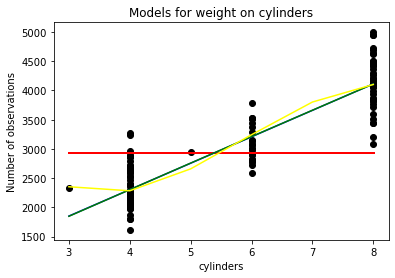

In [45]:
#plot for model on cylinders
plt.plot(df_test_cylinders['cylinders'],df_test_cylinders['weight'],'o', color = 'black')
plt.plot(df_test_cylinders['cylinders'], predicted_cylinders0, color = 'red')
plt.plot(line_cylinder1, color = 'blue')
plt.plot(line_cylinder2, color = 'green')
plt.plot(line_cylinder3, color = 'yellow')
plt.xlabel('cylinders')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on cylinders")
plt.show()



In [46]:
#find the renge of the inputs for mpg
inputs_mpg = inputs(df_test_mpg['mpg'])

In [47]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_mpg0 = np.array(model_mpg0.test_predicted())
line_mpg1 = pd.DataFrame(fit_line(model_mpg1.weights(), inputs_mpg), inputs_mpg) 
line_mpg2 = pd.DataFrame(fit_line(model_mpg2.weights(), inputs_mpg), inputs_mpg) 
line_mpg3 = pd.DataFrame(fit_line(model_mpg3.weights(), inputs_mpg), inputs_mpg)


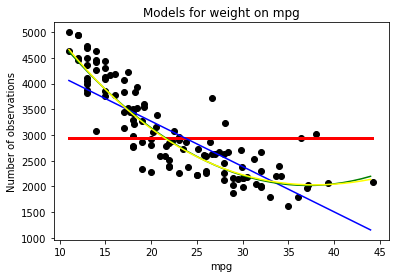

In [48]:
#plot for model on mpg
plt.plot(df_test_mpg['mpg'],df_test_mpg['weight'],'o', color = 'black')
plt.plot(df_test_mpg['mpg'], predicted_mpg0, color = 'red')
plt.plot(line_mpg1, color = 'blue')
plt.plot(line_mpg2, color = 'green')
plt.plot(line_mpg3, color = 'yellow')
plt.xlabel('mpg')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on mpg")
plt.show()

In [49]:
#find the renge of the inputs
inputs_displacement = inputs(df_test_displacement['displacement'])

In [50]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_displacement0 = np.array(model_displacement0.test_predicted())
line_displacement1 = pd.DataFrame(fit_line(model_displacement1.weights(), inputs_displacement), inputs_displacement) 
line_displacement2 = pd.DataFrame(fit_line(model_displacement2.weights(), inputs_displacement), inputs_displacement) 
line_displacement3 = pd.DataFrame(fit_line(model_displacement3.weights(), inputs_displacement), inputs_displacement)


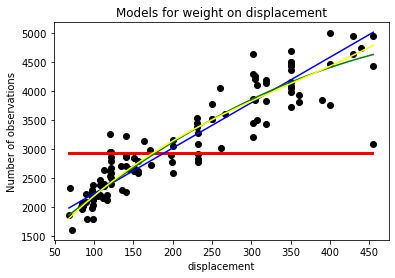

In [51]:
#plot for model on displacement
plt.plot(df_test_displacement['displacement'],df_test_displacement['weight'],'o', color = 'black')
plt.plot(df_test_displacement['displacement'], predicted_displacement0, color = 'red')
plt.plot(line_displacement1, color = 'blue')
plt.plot(line_displacement2, color = 'green')
plt.plot(line_displacement3, color = 'yellow')
plt.xlabel('displacement')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on displacement")
plt.show()

In [52]:
#find the renge of the inputs
inputs_horsepower = inputs(df_test_horsepower['horsepower'])

In [53]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_horsepower0 = np.array(model_horsepower0.test_predicted())
line_horsepower1 = pd.DataFrame(fit_line(model_horsepower1.weights(), inputs_horsepower), inputs_horsepower) 
line_horsepower2 = pd.DataFrame(fit_line(model_horsepower2.weights(), inputs_horsepower), inputs_horsepower) 
line_horsepower3 = pd.DataFrame(fit_line(model_horsepower3.weights(), inputs_horsepower), inputs_horsepower)


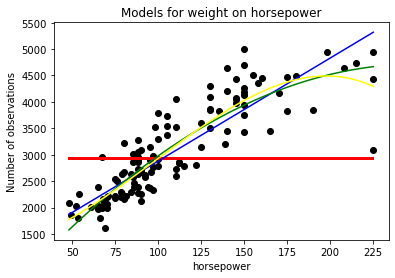

In [54]:
#plot for model on horsepower
plt.plot(df_test_horsepower['horsepower'],df_test_horsepower['weight'],'o', color = 'black')
plt.plot(df_test_horsepower['horsepower'], predicted_horsepower0, color = 'red')
plt.plot(line_horsepower1, color = 'blue')
plt.plot(line_horsepower2, color = 'green')
plt.plot(line_horsepower3, color = 'yellow')
plt.xlabel('horsepower')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on horsepower")
plt.show()

In [55]:
#find the renge of the inputs
inputs_acceleration = inputs(df_test_acceleration['acceleration'])

In [56]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_acceleration0 = np.array(model_acceleration0.test_predicted())
line_acceleration1 = pd.DataFrame(fit_line(model_acceleration1.weights(), inputs_acceleration), inputs_acceleration) 
line_acceleration2 = pd.DataFrame(fit_line(model_acceleration2.weights(), inputs_acceleration), inputs_acceleration) 
line_acceleration3 = pd.DataFrame(fit_line(model_acceleration3.weights(), inputs_acceleration), inputs_acceleration)


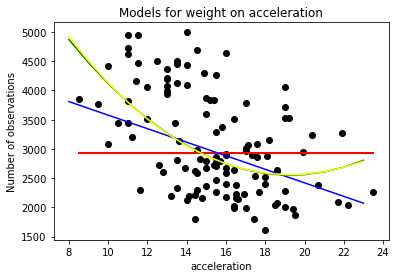

In [57]:
#plot for model on acceleration
plt.plot(df_test_acceleration['acceleration'],df_test_acceleration['weight'],'o', color = 'black')
plt.plot(df_test_acceleration['acceleration'], predicted_acceleration0, color = 'red')
plt.plot(line_acceleration1, color = 'blue')
plt.plot(line_acceleration2, color = 'green')
plt.plot(line_acceleration3, color = 'yellow')
plt.xlabel('acceleration')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on acceleration")
plt.show()

In [58]:
#find the renge of the inputs
inputs_model_year = inputs(df_test_model_year['model_year'])

In [59]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_model_year0 = np.array(model_model_year0.test_predicted())
line_model_year1 = pd.DataFrame(fit_line(model_model_year1.weights(), inputs_model_year), inputs_model_year) 
line_model_year2 = pd.DataFrame(fit_line(model_model_year2.weights(), inputs_model_year), inputs_model_year) 
line_model_year3 = pd.DataFrame(fit_line(model_model_year3.weights(), inputs_model_year), inputs_model_year)


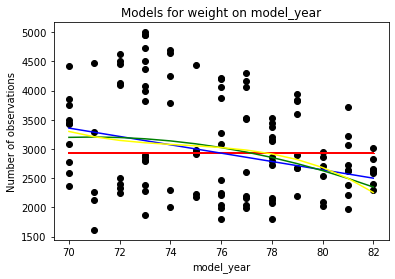

In [60]:
#plot for model on model_year
plt.plot(df_test_model_year['model_year'],df_test_model_year['weight'],'o', color = 'black')
plt.plot(df_test_model_year['model_year'], predicted_model_year0, color = 'red')
plt.plot(line_model_year1, color = 'blue')
plt.plot(line_model_year2, color = 'green')
plt.plot(line_model_year3, color = 'yellow')
plt.xlabel('model_year')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on model_year")
plt.show()

In [61]:
#find the renge of the inputs
inputs_origin = inputs(df_test_origin['origin'])

In [62]:
#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_origin0 = np.array(model_origin0.test_predicted())
line_origin1 = pd.DataFrame(fit_line(model_origin1.weights(), inputs_origin), inputs_origin) 
line_origin2 = pd.DataFrame(fit_line(model_origin2.weights(), inputs_origin), inputs_origin) 
line_origin3 = pd.DataFrame(fit_line(model_origin3.weights(), inputs_origin), inputs_origin)


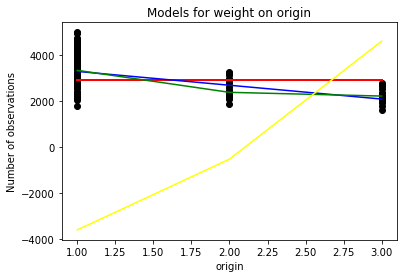

In [63]:
#plot for model on model_year
plt.plot(df_test_origin['origin'],df_test_origin['weight'],'o', color = 'black')
plt.plot(df_test_origin['origin'], predicted_origin0, color = 'red')
plt.plot(line_origin1, color = 'blue')
plt.plot(line_origin2, color = 'green')
plt.plot(line_origin3, color = 'yellow')
plt.xlabel('origin')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on origin")
plt.show()

(e) Repeat your analysis using an 80:20 train:test split. How does your answer change?

In [64]:
#fit the models for cylinders in all orders with 80:20 split
model_cylinders0 = regression(data= df, x = 'cylinders', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_cylinders1 = regression(data= df, x = 'cylinders', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_cylinders2 = regression(data= df, x = 'cylinders', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_cylinders3 = regression(data= df, x = 'cylinders', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [65]:
#Fit the models for displacement in all orders
model_displacement0 = regression(data= df, x = 'displacement', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_displacement1 = regression(data= df, x = 'displacement', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_displacement2 = regression(data= df, x = 'displacement', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_displacement3 = regression(data= df, x = 'displacement', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [66]:
#fit models for horsepower
model_horsepower0 = regression(data= df, x = 'horsepower', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_horsepower1 = regression(data= df, x = 'horsepower', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_horsepower2 = regression(data= df, x = 'horsepower', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_horsepower3 = regression(data= df, x = 'horsepower', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [67]:
#fit models for mpg
model_mpg0 = regression(data= df, x = 'mpg', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_mpg1 = regression(data= df, x = 'mpg', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_mpg2 = regression(data= df, x = 'mpg', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_mpg3 = regression(data= df, x = 'mpg', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [68]:
#fit models for acceleration
model_acceleration0 = regression(data= df, x = 'acceleration', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_acceleration1 = regression(data= df, x = 'acceleration', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_acceleration2 = regression(data= df, x = 'acceleration', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_acceleration3 = regression(data= df, x = 'acceleration', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [69]:
#fit models for model_year
model_model_year0 = regression(data= df, x = 'model_year', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_model_year1 = regression(data= df, x = 'model_year', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_model_year2 = regression(data= df, x = 'model_year', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_model_year3 = regression(data= df, x = 'model_year', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)


In [70]:
#fit models for origin
model_origin0 = regression(data= df, x = 'origin', y = 'weight', order = 0, ratio = 0.8, randomstate = 200)
model_origin1 = regression(data= df, x = 'origin', y = 'weight', order = 1, ratio = 0.8, randomstate = 200)
model_origin2 = regression(data= df, x = 'origin', y = 'weight', order = 2, ratio = 0.8, randomstate = 200)
model_origin3 = regression(data= df, x = 'origin', y = 'weight', order = 3, ratio = 0.8, randomstate = 200)



In [71]:
#create arrays to put in data frame containing MSE values as columns
set_class = pd.array([ 'set type', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing', 'training', 'testing'])
variable = pd.array([ 'variable name', 'cylinders', 'cylinders', 'mpg', 'mpg', 'displacement', 'displacement', 'horsepower', 'horsepower', 'acceleration', 'acceleration', 'model_year', 'model_year', 'origin', 'origin'])
order0 = pd.array([ 'MSE in order 0 poly', model_cylinders0.mse_train(), model_cylinders0.mse_test(), 
                   model_mpg0.mse_train(), model_mpg0.mse_test(),
                   model_displacement0.mse_train(), model_displacement0.mse_test(),
                   model_horsepower0.mse_train(), model_horsepower0.mse_test(),
                   model_acceleration0.mse_train(), model_acceleration0.mse_test(),
                   model_model_year0.mse_train(), model_model_year0.mse_test(),
                   model_origin0.mse_train(), model_origin0.mse_test()])

order1 = pd.array([ 'MSE in order 1 poly', model_cylinders1.mse_train(), model_cylinders1.mse_test(), 
                   model_mpg1.mse_train(), model_mpg1.mse_test(),
                   model_displacement1.mse_train(), model_displacement1.mse_test(),
                   model_horsepower1.mse_train(), model_horsepower1.mse_test(),
                   model_acceleration1.mse_train(), model_acceleration1.mse_test(),
                   model_model_year1.mse_train(), model_model_year1.mse_test(),
                   model_origin1.mse_train(), model_origin1.mse_test()])

order2 = pd.array(['MSE in order 2 poly', model_cylinders2.mse_train(), model_cylinders2.mse_test(), 
                   model_mpg2.mse_train(), model_mpg2.mse_test(),
                   model_displacement2.mse_train(), model_displacement2.mse_test(),
                   model_horsepower2.mse_train(), model_horsepower2.mse_test(),
                   model_acceleration2.mse_train(), model_acceleration2.mse_test(),
                   model_model_year2.mse_train(), model_model_year2.mse_test(),
                   model_origin2.mse_train(), model_origin2.mse_test()])

order3 = pd.array(['MSE in order 3 poly',model_cylinders3.mse_train(), model_cylinders3.mse_test(), 
                   model_mpg3.mse_train(), model_mpg3.mse_test(),
                   model_displacement3.mse_train(), model_displacement3.mse_test(),
                   model_horsepower3.mse_train(), model_horsepower3.mse_test(),
                   model_acceleration3.mse_train(), model_acceleration3.mse_test(),
                   model_model_year3.mse_train(), model_model_year3.mse_test(),
                   model_origin3.mse_train(), model_origin3.mse_test()])



The following dataframe is based on models uilt from a 80:20 split. It contains per column: the classification of the dataset (test or training), the variable name, and the MSE obtained from the 0 to 3 degree polynomials obtained above in order.

In [72]:
#plot the MSE of the 70:20 split for all instances
mse_df_8020 = pd.DataFrame([set_class, variable, order0, order1, order2, order3])
mse_df_8020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,set type,training,testing,training,testing,training,testing,training,testing,training,testing,training,testing,training,testing
1,variable name,cylinders,cylinders,mpg,mpg,displacement,displacement,horsepower,horsepower,acceleration,acceleration,model_year,model_year,origin,origin
2,MSE in order 0 poly,222103170.6847911,60078618.249709494,222103125.50509775,60079006.21942715,222103174.01278415,60077659.07519531,222103206.45412797,60078497.6398308,222103165.37842256,60078427.25699234,222103160.86071238,60078514.077193365,222103137.48710647,60077616.12466479
3,MSE in order 1 poly,43685764.474668436,11193640.148489613,70005909.20451213,16770863.279751841,30537005.811263002,6016400.706035828,55862829.15860074,15447315.287395444,184339398.26885876,48854980.00462925,200176668.0328044,55045765.966271915,148125837.58343998,37625546.992324784
4,MSE in order 2 poly,43475647.75258351,11323979.95199125,46918691.213299975,10227817.511438709,28038938.67920013,5222419.540215958,48332141.074899815,13493408.40595369,172833766.37320185,46318505.77667671,196640624.48048598,56235492.21941395,143922055.52454385,34814483.475544155
5,MSE in order 3 poly,43042575.5245521,10993520.745445257,46452940.530027054,10245849.176142883,28038899.33545456,5221543.464451926,46289289.89935345,12863111.941205692,171897523.52965173,48147393.83601131,196568427.18521446,56265489.8810773,2720513989.8340964,596069026.9307722


In [73]:
#reset index values for test dataset before ploting
df_test_cylinders = model_cylinders0.test().reset_index(drop = True)
df_test_mpg = model_mpg0.test().reset_index(drop = True)
df_test_displacement = model_displacement0.test().reset_index(drop = True)
df_test_horsepower = model_horsepower0.test().reset_index(drop = True)
df_test_acceleration = model_acceleration0.test().reset_index(drop = True)
df_test_model_year = model_model_year0.test().reset_index(drop = True)
df_test_origin = model_origin0.test().reset_index(drop = True)


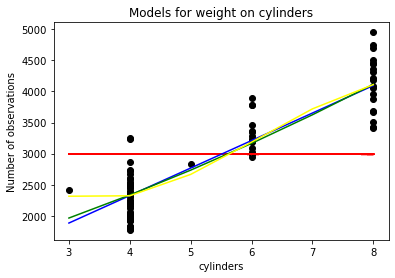

In [74]:
#Plot the lines and data for the testing set Cylinders 
#find the renge of the inputs 
inputs_cylinders = inputs(df_test_cylinders['cylinders'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_cylinders0 = np.array(model_cylinders0.test_predicted())
line_cylinder1 = pd.DataFrame(fit_line(model_cylinders1.weights(), inputs_cylinders), inputs_cylinders) 
line_cylinder2 = pd.DataFrame(fit_line(model_cylinders2.weights(), inputs_cylinders), inputs_cylinders) 
line_cylinder3 = pd.DataFrame(fit_line(model_cylinders3.weights(), inputs_cylinders), inputs_cylinders) 

#plot for model on cylinders
plt.plot(df_test_cylinders['cylinders'],df_test_cylinders['weight'],'o', color = 'black')
plt.plot(df_test_cylinders['cylinders'], predicted_cylinders0, color = 'red')
plt.plot(line_cylinder1, color = 'blue')
plt.plot(line_cylinder2, color = 'green')
plt.plot(line_cylinder3, color = 'yellow')
plt.xlabel('cylinders')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on cylinders")
plt.show()


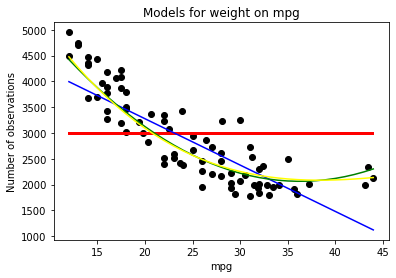

In [75]:
#Plot the lines and data for the testing set mpg 
#find the renge of the inputs for mpg
inputs_mpg = inputs(df_test_mpg['mpg'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_mpg0 = np.array(model_mpg0.test_predicted())
line_mpg1 = pd.DataFrame(fit_line(model_mpg1.weights(), inputs_mpg), inputs_mpg) 
line_mpg2 = pd.DataFrame(fit_line(model_mpg2.weights(), inputs_mpg), inputs_mpg) 
line_mpg3 = pd.DataFrame(fit_line(model_mpg3.weights(), inputs_mpg), inputs_mpg)

#plot for model on mpg
plt.plot(df_test_mpg['mpg'],df_test_mpg['weight'],'o', color = 'black')
plt.plot(df_test_mpg['mpg'], predicted_mpg0, color = 'red')
plt.plot(line_mpg1, color = 'blue')
plt.plot(line_mpg2, color = 'green')
plt.plot(line_mpg3, color = 'yellow')
plt.xlabel('mpg')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on mpg")
plt.show()


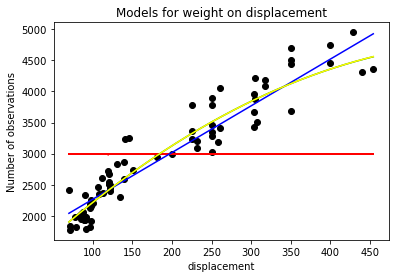

In [76]:
#Plot the lines and data for the testing set displacement
#find the renge of the inputs
inputs_displacement = inputs(df_test_displacement['displacement'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_displacement0 = np.array(model_displacement0.test_predicted())
line_displacement1 = pd.DataFrame(fit_line(model_displacement1.weights(), inputs_displacement), inputs_displacement) 
line_displacement2 = pd.DataFrame(fit_line(model_displacement2.weights(), inputs_displacement), inputs_displacement) 
line_displacement3 = pd.DataFrame(fit_line(model_displacement3.weights(), inputs_displacement), inputs_displacement)

#plot for model on displacement
plt.plot(df_test_displacement['displacement'],df_test_displacement['weight'],'o', color = 'black')
plt.plot(df_test_displacement['displacement'], predicted_displacement0, color = 'red')
plt.plot(line_displacement1, color = 'blue')
plt.plot(line_displacement2, color = 'green')
plt.plot(line_displacement3, color = 'yellow')
plt.xlabel('displacement')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on displacement")
plt.show()


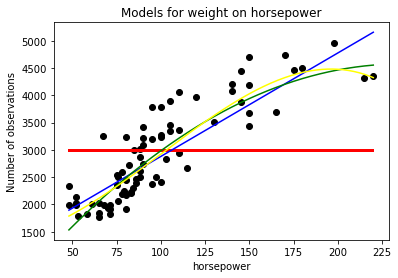

In [77]:
#Plot the lines and data for the testing set horsepower
#find the renge of the inputs
inputs_horsepower = inputs(df_test_horsepower['horsepower'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_horsepower0 = np.array(model_horsepower0.test_predicted())
line_horsepower1 = pd.DataFrame(fit_line(model_horsepower1.weights(), inputs_horsepower), inputs_horsepower) 
line_horsepower2 = pd.DataFrame(fit_line(model_horsepower2.weights(), inputs_horsepower), inputs_horsepower) 
line_horsepower3 = pd.DataFrame(fit_line(model_horsepower3.weights(), inputs_horsepower), inputs_horsepower)

#plot for model on horsepower
plt.plot(df_test_horsepower['horsepower'],df_test_horsepower['weight'],'o', color = 'black')
plt.plot(df_test_horsepower['horsepower'], predicted_horsepower0, color = 'red')
plt.plot(line_horsepower1, color = 'blue')
plt.plot(line_horsepower2, color = 'green')
plt.plot(line_horsepower3, color = 'yellow')
plt.xlabel('horsepower')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on horsepower")
plt.show()


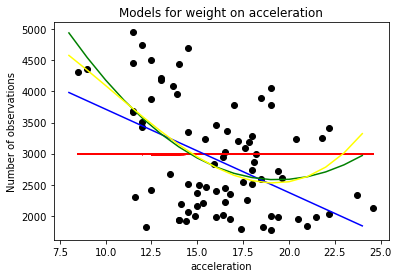

In [78]:
#Plot the lines and data for the testing set acceleration
#find the renge of the inputs
inputs_acceleration = inputs(df_test_acceleration['acceleration'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_acceleration0 = np.array(model_acceleration0.test_predicted())
line_acceleration1 = pd.DataFrame(fit_line(model_acceleration1.weights(), inputs_acceleration), inputs_acceleration) 
line_acceleration2 = pd.DataFrame(fit_line(model_acceleration2.weights(), inputs_acceleration), inputs_acceleration) 
line_acceleration3 = pd.DataFrame(fit_line(model_acceleration3.weights(), inputs_acceleration), inputs_acceleration)

#plot for model on acceleration
plt.plot(df_test_acceleration['acceleration'],df_test_acceleration['weight'],'o', color = 'black')
plt.plot(df_test_acceleration['acceleration'], predicted_acceleration0, color = 'red')
plt.plot(line_acceleration1, color = 'blue')
plt.plot(line_acceleration2, color = 'green')
plt.plot(line_acceleration3, color = 'yellow')
plt.xlabel('acceleration')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on acceleration")
plt.show()


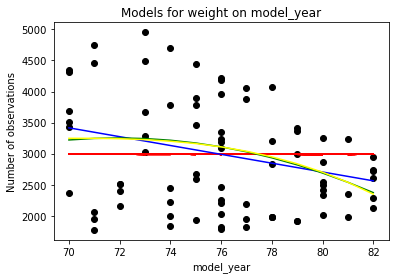

In [79]:
#Plot the lines and data for the testing set model_year
#find the renge of the inputs
inputs_model_year = inputs(df_test_model_year['model_year'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_model_year0 = np.array(model_model_year0.test_predicted())
line_model_year1 = pd.DataFrame(fit_line(model_model_year1.weights(), inputs_model_year), inputs_model_year) 
line_model_year2 = pd.DataFrame(fit_line(model_model_year2.weights(), inputs_model_year), inputs_model_year) 
line_model_year3 = pd.DataFrame(fit_line(model_model_year3.weights(), inputs_model_year), inputs_model_year)

#plot for model on model_year
plt.plot(df_test_model_year['model_year'],df_test_model_year['weight'],'o', color = 'black')
plt.plot(df_test_model_year['model_year'], predicted_model_year0, color = 'red')
plt.plot(line_model_year1, color = 'blue')
plt.plot(line_model_year2, color = 'green')
plt.plot(line_model_year3, color = 'yellow')
plt.xlabel('model_year')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on model_year")
plt.show()


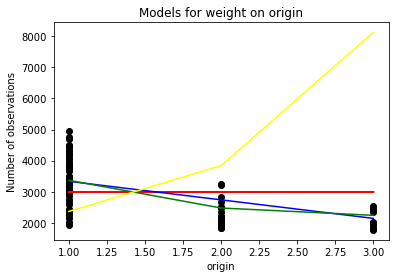

In [80]:
#Plot the lines and data for the testing set origin
#find the renge of the inputs
inputs_origin = inputs(df_test_origin['origin'])

#fit the input values to the corresponding polynomial and place in dataframe for ploting
predicted_origin0 = np.array(model_origin0.test_predicted())
line_origin1 = pd.DataFrame(fit_line(model_origin1.weights(), inputs_origin), inputs_origin) 
line_origin2 = pd.DataFrame(fit_line(model_origin2.weights(), inputs_origin), inputs_origin) 
line_origin3 = pd.DataFrame(fit_line(model_origin3.weights(), inputs_origin), inputs_origin)

#plot for model on model_year
plt.plot(df_test_origin['origin'],df_test_origin['weight'],'o', color = 'black')
plt.plot(df_test_origin['origin'], predicted_origin0, color = 'red')
plt.plot(line_origin1, color = 'blue')
plt.plot(line_origin2, color = 'green')
plt.plot(line_origin3, color = 'yellow')
plt.xlabel('origin')  
plt.ylabel('Number of observations')   
plt.title("Models for weight on origin")
plt.show()


### 6: [10pt]
Allowed libraries: pandas, scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

(a) Using logistic regression (1st order), perform classification on the various classes (light/medium/heavy). Create one regression model per feature.  

(b) Report the training/testing classification performance using both precision and recall. For this classification task, give an example and explain when each of the metrics would be more desirable.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [82]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [83]:
#you will use the float value of weights later
weights_float = df['weight']

In [84]:
# get weights in classes
df2 = df
df2["weight"] = weight_binned

Building the cylinder model

In [85]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['cylinders'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_cylinders = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_cylinders.predict(X_test)
#calculate precision 
lr_cylinders_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_cylinders_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for mpg

In [86]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['mpg'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_mpg = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_mpg.predict(X_test)
#calculate precision 
lr_mpg_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_mpg_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for displacement

In [87]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['displacement'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_displacement = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_displacement.predict(X_test)
#calculate precision 
lr_displacement_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_displacement_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for horsepower

In [88]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['horsepower'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_horsepower = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_horsepower.predict(X_test)
#calculate precision 
lr_horsepower_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_horsepower_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for acceleration

In [89]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['acceleration'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_acceleration = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_acceleration.predict(X_test)
#calculate precision 
lr_acceleration_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_acceleration_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for model_year

In [90]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['model_year'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_model_year = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_model_year.predict(X_test)
#calculate precision 
lr_model_year_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_model_year_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Building the model for origin

In [91]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['origin'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

#fitting the model
lr_origin = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_origin.predict(X_test)
#calculate precision 
lr_origin_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_origin_recall = recall_score(y_test,y_pred, average = 'weighted')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After building each of the models with logistic regression I calculated the precision and recall score for each and place them in the following dataframe:

In [92]:
#build rows for dataframe of scores
row1 = pd.array(['Cylinders', lr_cylinders_precision, lr_cylinders_recall])
row2 = pd.array(['mpg', lr_mpg_precision, lr_mpg_recall])
row3 = pd.array(['Displacement', lr_displacement_precision, lr_displacement_recall])
row4 = pd.array(['Horsepower', lr_horsepower_precision, lr_horsepower_recall])
row5 = pd.array(['Acceleration', lr_acceleration_precision, lr_acceleration_recall])
row6 = pd.array(['Model Year', lr_model_year_precision, lr_model_year_recall])
row7 = pd.array(['Origin', lr_origin_precision, lr_origin_recall])
scores = pd.DataFrame([row1, row2, row3, row4, row5, row6, row7])
scores.columns = ['Classifying variable', 'Precision score', 'Recall score']
scores


,Classifying variable,Precision score,Recall score
0,Cylinders,0.8885130323315767,0.8898305084745762
1,mpg,0.9152542372881356,0.9152542372881356
2,Displacement,0.8983050847457628,0.8983050847457628
3,Horsepower,0.8973866279948035,0.8983050847457628
4,Acceleration,0.7617552859815203,0.7711864406779662
5,Model Year,0.6775423728813559,0.7033898305084746
6,Origin,0.4712008043665613,0.6864406779661016


Since the difference in their computation is that recall accounts for false negatives and precision for false positives. We would use recall for situations where false negatives are important such as blood test and other medical tests. We would use precision for situations where false negatives are not such a big deal such as the Netflix recommender system. If my Netflix algorithm fails to recommend a movie that I would have liked there will be no consequences. However if I am given a false negative in let's say a gene detection test for a genetic decease, there could be serious reprecautions. 

### 7: [5pt]

Allowed libraries: pandas, scikit-learn

(a) Re-do the logistic regression training/testing, but now after you apply min-max normalization to the dataset. Do you see any difference in performance?

In [93]:
from sklearn.preprocessing import MinMaxScaler


In [94]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['cylinders'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_cylinders = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_cylinders.predict(X_test)
#calculate precision 
lr_cylinders_precision = precision_score(y_test, y_pred, average = 'weighted') #macro or weigthed
#calculate recall
lr_cylinders_recall = recall_score(y_test,y_pred, average = 'weighted')



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [95]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['mpg'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_mpg = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_mpg.predict(X_test)
#calculate precision 
lr_mpg_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_mpg_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['displacement'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_displacement = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_displacement.predict(X_test)
#calculate precision 
lr_displacement_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_displacement_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [97]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['horsepower'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_horsepower = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_horsepower.predict(X_test)
#calculate precision 
lr_horsepower_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_horsepower_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['acceleration'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_acceleration = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_acceleration.predict(X_test)
#calculate precision 
lr_acceleration_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_acceleration_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['model_year'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_model_year = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_model_year.predict(X_test)
#calculate precision 
lr_model_year_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_model_year_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [100]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df2['origin'], df2['weight'], test_size=0.3, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
#apply min-max normalization to the dataset
X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

#fitting the model
lr_origin = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr_origin.predict(X_test)
#calculate precision 
lr_origin_precision = precision_score(y_test, y_pred, average = 'weighted')
#calculate recall
lr_origin_recall = recall_score(y_test,y_pred, average = 'weighted')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After building each of the models with logistic regression using the MinMaxScaler, I calculated the precision and recall score for each and place them in the following dataframe:

In [101]:
#build rows for dataframe of scores
row1 = pd.array(['Cylinders', lr_cylinders_precision, lr_cylinders_recall])
row2 = pd.array(['mpg', lr_mpg_precision, lr_mpg_recall])
row3 = pd.array(['Displacement', lr_displacement_precision, lr_displacement_recall])
row4 = pd.array(['Horsepower', lr_horsepower_precision, lr_horsepower_recall])
row5 = pd.array(['Acceleration', lr_acceleration_precision, lr_acceleration_recall])
row6 = pd.array(['Model Year', lr_model_year_precision, lr_model_year_recall])
row7 = pd.array(['Origin', lr_origin_precision, lr_origin_recall])
scores_minmax = pd.DataFrame([row1, row2, row3, row4, row5, row6, row7])
scores_minmax.columns = ['Classifying variable', 'Precision score', 'Recall score']
scores_minmax

,Classifying variable,Precision score,Recall score
0,Cylinders,0.8885130323315767,0.8898305084745762
1,mpg,0.9152542372881356,0.9152542372881356
2,Displacement,0.9067488667717777,0.9067796610169492
3,Horsepower,0.8986444448634076,0.8983050847457628
4,Acceleration,0.7611985472154964,0.7542372881355932
5,Model Year,0.6775423728813559,0.7033898305084746
6,Origin,0.4712008043665613,0.6864406779661016


After comparing the two dataframes containing recal/precision scores I have noticed that only displacement, horsepower and acceleration showed minimal improvement.

### 8: [15pt]

Allowed libraries: pandas, scikit-learn

For each part: Make your prediction using either a single linear or logistic regression that includes all regression terms. Attempt to use a combination of first and second order terms.

(a) If a USA manufacturer (origin 1) had considered to introduce a model in 1981 with the following characteristics: 4 cylinders, 400 cc displacement, 150 horsepower, 3500 lb weight, 8 m/sec2 acceleration, what is the MPG rating that we should have expected?


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
#backup for later
df3 = df


In [104]:
# prepare the dataset
df2['weight'] = weights_float
df2 = df2.drop(['mpg', 'car_name'], axis = 1, inplace = False)

In [105]:
from sklearn.metrics import r2_score

In [106]:
cylinders = df2['cylinders']
displacement = df2['displacement']
horsepower = df2['horsepower']
weight = df2['weight']
acceleration = df2['acceleration']
model_year = df2['model_year']
origin = df2['origin']


In [107]:
data4 = {'cylinders':cylinders, 'displacement':displacement, 'horsepower':horsepower,'weight':weight,'acceleration':acceleration,'model_year':model_year, 'origin':origin}
df4 = pd.DataFrame(data4)


In [108]:
#regression model on mpg with all variables as is
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df4, df['mpg'], test_size=0.3, random_state=1)

#fitting the model
lr = LinearRegression().fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr.predict(X_test)
#calculate  
lr_r2score = r2_score(y_test, y_pred)



The first prediction was made with the first model which was built using all the numerical variables available and yeald a prediction for a mpg of: 

In [109]:
#predict
w_prediction = lr.predict(np.matrix('4, 400, 150, 3500, 8, 81, 1'))
w_prediction


array([24.64307201])

with an accuracy of:

In [110]:
lr_r2score

0.8222890437898107

After some esploration and testing another model was found with an improved accurracy.

In [111]:
data4 = {'cylinders':cylinders, 'displacement':displacement**2, 'horsepower':horsepower,'weight':weight,'model_year':model_year, 'origin':origin}
df4 = pd.DataFrame(data4)


In [112]:
#regression model on mpg with one squared and no acceleration
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df4, df['mpg'], test_size=0.3, random_state=1)

#fitting the model
lr = LinearRegression().fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr.predict(X_test)
#calculate  
lr_r2score = r2_score(y_test, y_pred)


The second model was built using only cylinders, displacement, horsepower, weight, model_year and origin and contain one second degree regression term for displacement. The prediction obtain was for a mpg of:

In [113]:
#predict
w_prediction = lr.predict(np.matrix('4, 400, 150, 3500, 81, 1'))
w_prediction


array([17.98348027])

with an accuracy of:

In [114]:
lr_r2score

0.8450773905320207

(b) In which weight class (light, medium, heavy) would it belong?

In [115]:
df3 = df.drop(['weight', 'car_name'], axis = 1, inplace = False )
df2['weight'] = weight_binned 


In [116]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split( df3, df2['weight'], test_size=0.3, random_state=1)

#fitting the model
lr = LogisticRegression(solver = "newton-cg", random_state = 1).fit(X_train,y_train)
#predicting the values with X_test
y_pred = lr.predict(X_test)
#calculate precision 
lr_precision = precision_score(y_test, y_pred, average = 'weighted') #macro or weigthed
#calculate recall
lr_recall = recall_score(y_test,y_pred, average = 'weighted')


With a precision score of:

In [117]:
lr_precision

0.9580842997323817

The logistic regression model using all the variables obtain a prediction of weight category for a car with an mpg of 17.98348027 of:

In [118]:
lr.predict(np.matrix('17.98348027, 4, 400, 150, 8, 81, 1'))

array(['heavy'], dtype=object)